## Lesson-01

In [1]:
import random

In [2]:
two_number = """
num* => num num* | num
num => 0 | 1 | 2 | 3 | 4 | 5
"""

In [3]:
def two_num():
    return num() + num()

In [4]:
def num():
    return random.choice('0 | 1 | 2 | 3 | 4 | 5'.split('|'))

In [5]:
def numbers():
    if random.random() < 0.5:
        return num()
    else:
        return num() + numbers()

In [6]:
num()

' 5'

In [7]:
two_num()

' 3  3 '

In [8]:
for i in range(10):
    print(numbers())

 3  5
 1 
 3 
 2 
 2  5
 5
 1 
 4  5 4 
 3 
0 


In [9]:
simple_grammar = """
sentence => noun_phrase verb_phrase
noun_phrase => Article Adj* noun
Adj* => null | Adj Adj*
verb_phrase => verb noun_phrase
Article =>  一个 | 这个
noun =>   女人 |  篮球 | 桌子 | 小猫
verb => 看着   |  坐在 |  听着 | 看见
Adj =>  蓝色的 | 好看的 | 小小的
"""

In [10]:
another_grammar = """
# 
"""

In [11]:
import random

In [12]:
# 按|这条线把字符串分割,返回成列表,random.choice随机从该列表选择一项
# 后面那个split把文字前后空格去掉,返回列表，切片为0取出字符串
def adj():  
    return random.choice('蓝色的 | 好看的 | 小小的'.split('|')).split()[0]

#lambda代表函数，choice调用里面的函数之一，函数要想输出值须在后面加括号()
def adj_star():
    return random.choice([lambda : '', lambda : adj() + adj_star()])()

In [13]:
adj_star()

''

In [14]:
for i in range(20):
    print(adj_star())

小小的
小小的

蓝色的小小的


好看的
小小的


蓝色的

小小的
蓝色的蓝色的小小的
蓝色的



小小的蓝色的好看的
好看的


### 但问题是，如果我们改变了语法，所有的句子又得重写，这就很麻烦了？
### 有没有简单一点的方法呢？

In [15]:
adj_grammar = """
Adj* => null | Adj Adj*
Adj =>  蓝色的 | 好看的 | 小小的
"""

In [16]:
#把语法模式改成字典
def create_grammar(grammar_str, split = '=>', line_split='\n'):
    #为一个语法模型创建空字典
    grammar = {}
    #对一个已经定义好的语法进行操作，例如host,human
    #先将每一行分开成列表
    for line in grammar_str.split(line_split):
        #如果某一行是空值，则继续前进到下一行
        if not line.strip(): continue
        #按‘=>’这个符号把每一行里面的表达式和内容划分开
        exp, stmt = line.split(split)
        #先把内容根据空格和竖线划分开，把表达式和内容传入字典中
        grammar[exp.strip()] = [s.split() for s in stmt.split('|')]
    return grammar

In [17]:
grammar = create_grammar(adj_grammar)

In [18]:
grammar['Adj*']

[['null'], ['Adj', 'Adj*']]

In [19]:
#取出字典的值，形成句子
choice = random.choice
def generate(gram, target):
    #设置递归终止条件，如果目标不在对应的key这列中则直接返回value
    if target not in gram:
        return target
    #注意choice返回的是列表中套着的列表！这个套着的列表可以对每个值递归下去,直到变成字符
    expanded = [generate(gram,t) for t in choice(gram[target])]
    #把expanded列表中的字符串连接起来，后面是排除Null值
    #/n相当于一个换行的条件，如果出现则换行('\n')
    #这个换行是专门针对后面写的programming语句设置的条件
    return ''.join([e if e != '/n' else '\n' for e in expanded if e != 'null' ])

# 上面那个列表生成式的正常写法
# e for e in expanded:
#     if e != 'null':
#         if e != '/n':
#             e
#         else '\n'

In [20]:
example_grammar = create_grammar(simple_grammar)

In [21]:
example_grammar

{'sentence': [['noun_phrase', 'verb_phrase']],
 'noun_phrase': [['Article', 'Adj*', 'noun']],
 'Adj*': [['null'], ['Adj', 'Adj*']],
 'verb_phrase': [['verb', 'noun_phrase']],
 'Article': [['一个'], ['这个']],
 'noun': [['女人'], ['篮球'], ['桌子'], ['小猫']],
 'verb': [['看着'], ['坐在'], ['听着'], ['看见']],
 'Adj': [['蓝色的'], ['好看的'], ['小小的']]}

In [22]:
generate(gram=example_grammar, target='sentence')

'一个桌子看着这个蓝色的小小的小猫'

In [23]:
#在西部世界里，一个”人类“的语言可以定义为：

human = """
human = 自己 寻找 活动
自己 = 我 | 俺 | 我们 
寻找 = 找找 | 想找点 
活动 = 乐子 | 玩的
"""


#一个“接待员”的语言可以定义为

host = """
host = 寒暄 报数 询问 业务相关 结尾 
报数 = 我是 数字 号 ,
数字 = 单个数字 | 数字 单个数字 
单个数字 = 1 | 2 | 3 | 4 | 5 | 6 | 7 | 8 | 9 
寒暄 = 称谓 打招呼 | 打招呼
称谓 = 人称 ,
人称 = 先生 | 女士 | 小朋友
打招呼 = 你好 | 您好 
询问 = 请问你要 | 您需要
业务相关 = 具体业务
具体业务 = 喝酒 | 打牌 | 打猎 | 赌博
结尾 = 吗？
"""

In [24]:
for i in range(10):
    print(generate(gram=create_grammar(host, split = '='),target='host'))

你好我是7号,请问你要打牌吗？
先生,您好我是5号,请问你要赌博吗？
您好我是87号,您需要打牌吗？
先生,你好我是7号,您需要喝酒吗？
您好我是14号,请问你要打猎吗？
小朋友,您好我是341号,您需要打牌吗？
女士,你好我是36号,请问你要打牌吗？
小朋友,你好我是33号,您需要赌博吗？
你好我是2号,请问你要打牌吗？
您好我是9号,请问你要喝酒吗？


In [25]:
for i in range(10):
    print(generate(gram=create_grammar(human, split = '='),target='human'))

俺想找点玩的
我找找玩的
我们找找玩的
我们找找玩的
我们想找点玩的
俺找找乐子
我想找点玩的
我找找乐子
我找找乐子
我们想找点玩的


希望能够生成最合理的一句话？ 

## Data Driven

我们的目标是，希望能做一个程序，然后，当输入的数据变化的时候，我们的程序不用重写。Generalization.

AI? 如何能自动化解决问题，我们找到一个方法之后，输入变了，我们的这个方法，不用变。

In [26]:
simpel_programming = '''
programming => if_stmt | assign | while_loop
while_loop => while ( cond ) { change_line stmt change_line }
if_stmt => if ( cond )  { change_line stmt change_line } | if ( cond )  { change_line stmt change_line } else { change_line stmt change_line } 
change_line => /N
cond => var op var
op => | == | < | >= | <= 
stmt => assign | if_stmt
assign => var = var
var =>  var _ num | words 
words => words _ word | word 
word => name | info |  student | lib | database 
nums => nums num | num
num => 1 | 2 | 3 | 4 | 5 | 6 | 7 | 8 | 9 | 0
'''

In [27]:
print(generate(gram=create_grammar(simpel_programming, split='=>'), target='programming'))

if(info_lib<=info_student_info_8){/Nstudent_7=database_4/N}else{/Ndatabase_0_8=student_1_6/N}


In [28]:
def pretty_print(line):
    # utility tool function
    lines = line.split('/N')
    
    code_lines = []
    
    for i, sen in enumerate(lines):
        if i < len(lines) / 2: 
            #print()
            code_lines.append(i * "  " + sen)
        else:
            code_lines.append((len(lines) - i) * " " + sen)
    
    return code_lines

In [29]:
generated_programming = []

for i in range(20):
    generated_programming += pretty_print(generate(gram=create_grammar(simpel_programming, split='=>'), target='programming'))

In [30]:
for line in generated_programming:
    print(line)

if(name==lib_7){
  if(info_database_info_4<=student_name_3_5_6){
    info=lib
      }else{
        if(info_database<student_database_student_database_database){
          if(student_database_name_6student_3_0){
            if(student_info==lib){
              if(name_lib_0_4<=student_name){
                if(database_lib_info>=database_2){
                  database=student_lib_name_2
                    }else{
                      student_info_info_lib_info_info_5=student
                        }
                          }
                            }
                              }else{
               name_4=student_7
              }
             }else{
            if(lib<=info_7){
           if(info_student_2_5<lib_student_database_3){
          if(student_name_0_3<student_name_name_9){
         student_student=name
        }else{
       name=student_info
      }
     }
    }
   }
  }
 }
database_lib_7_8=info_name
if(info==info_lib_name_student_info_student_9_4_6_2_3){
  studen

### 当我们可以自由地根据语法结构生成句子以后，又发现了另一个问题
### 有的句子看上去很奇怪，从概率的角度来说，就是出现的次数很少
### 这里我们引入 Language model

$$ language\_model(String) = Probability(String) \in (0, 1) $$

$$ Pro(w_1 w_2 w_3 w_4) = Pr(w_1 | w_2 w_3 w_ 4) * P(w2 | w_3 w_4) * Pr(w_3 | w_4) * Pr(w_4)$$ 

$$ Pro(w_1 w_2 w_3 w_4) \sim Pr(w_1 | w_2 ) * P(w2 | w_3 ) * Pr(w_3 | w_4) * Pr(w_4)$$ 

how to get $ Pr(w1 | w2 w3 w4) $ ?

## 1.条件概率
## 2.独立概率

### 假如你上班365天，迟到30次
### Pr（迟到） = 30/365

### 假如你一年中，有60次拉肚子，其中20次迟到了

### Pr（迟到 | 拉肚子）= 20/60

In [31]:
import random

In [32]:
random.choice(range(100))

50

In [33]:
#filename = '/Users/gaominquan/Downloads/sqlResult_1558435.csv'
filename = r'C:\Users\shab\Desktop\开课吧\第二章 人工智能引论与思维方法\第1节 人工智能引论之概率模型与语言自动生成模型\资料\export_sql_1558435\sqlResult_1558435.csv'

In [34]:
import pandas as pd

In [35]:
content = pd.read_csv(filename, engine='python')

In [36]:
content.head()

,id,author,source,content,feature,title,url
0,89617,NaN,快科技@http://www.kkj.cn/,此外，自本周（6月12日）起，除小米手机6等15款机型外，其余机型已暂停更新发布（含开发版/...,"{""type"":""科技"",""site"":""cnbeta"",""commentNum"":""37""...",小米MIUI 9首批机型曝光：共计15款,http://www.cnbeta.com/articles/tech/623597.htm
1,89616,NaN,快科技@http://www.kkj.cn/,骁龙835作为唯一通过Windows 10桌面平台认证的ARM处理器，高通强调，不会因为只考...,"{""type"":""科技"",""site"":""cnbeta"",""commentNum"":""15""...",骁龙835在Windows 10上的性能表现有望改善,http://www.cnbeta.com/articles/tech/623599.htm
2,89615,NaN,快科技@http://www.kkj.cn/,此前的一加3T搭载的是3400mAh电池，DashCharge快充规格为5V/4A。\r\n...,"{""type"":""科技"",""site"":""cnbeta"",""commentNum"":""18""...",一加手机5细节曝光：3300mAh、充半小时用1天,http://www.cnbeta.com/articles/tech/623601.htm
3,89614,NaN,新华社,这是6月18日在葡萄牙中部大佩德罗冈地区拍摄的被森林大火烧毁的汽车。新华社记者张立云摄\r\n,"{""type"":""国际新闻"",""site"":""环球"",""commentNum"":""0"",""j...",葡森林火灾造成至少62人死亡 政府宣布进入紧急状态（组图）,http://world.huanqiu.com/hot/2017-06/10866126....
4,89613,胡淑丽_MN7479,深圳大件事,（原标题：44岁女子跑深圳约会网友被拒，暴雨中裸身奔走……）\r\n@深圳交警微博称：昨日清...,"{""type"":""新闻"",""site"":""网易热门"",""commentNum"":""978"",...",44岁女子约网友被拒暴雨中裸奔 交警为其披衣相随,http://news.163.com/17/0618/00/CN617P3Q0001875...


In [37]:
articles = content['content'].tolist()

In [38]:
len(articles)

89611

In [39]:
import re

In [40]:
import jieba

In [41]:
def token(string):
    # we will learn the regular expression next course.
    return re.findall('\w+', string)

In [42]:
from collections import Counter

In [43]:
with_jieba_cut = Counter(jieba.cut(articles[110]))

Building prefix dict from the default dictionary ...
Loading model from cache C:\Users\shab\AppData\Local\Temp\jieba.cache
Loading model cost 0.613 seconds.
Prefix dict has been built succesfully.


In [44]:
with_jieba_cut.most_common()[:10]

[('，', 88),
 ('的', 73),
 ('。', 39),
 ('\r\n', 27),
 ('了', 20),
 ('们', 18),
 ('工作队', 16),
 ('村民', 15),
 ('收割', 14),
 ('、', 12)]

In [45]:
''.join(token(articles[110]))

'在外国名著麦田里的守望者中作者想要守护麦田里如自己内心一般纯真的孩子们而驻村干部们也在这个炎热的夏天里撸袖子上阵真正做起了村民们的麦田守望者三夏时节不等人你看到了吗不停翻涌起伏仿若铺陈至天边的金黄麦浪中那若隐若现的人影是自治区新闻出版广电局驻和田市肖尔巴格乡合尼村工作队的队员与工作队组织的青年志愿者在这个炎热的夏季他们深入田间地头帮助村民们收割小麦扛起收麦机麦田中的每个人都显得兴致勃勃一天下来就近22亩小麦收割完毕志愿者麦麦提亚森擦去满脸的汗水高兴地告诉驻村队员我们青年志愿者应该多做贡献为村里的脱贫致富出把力工作队带着我们为村里的老人服务看到那些像我爷爷奶奶一样的老人赞许感谢的目光我体会到了帮助他人的快乐自治区新闻出版广电局驻村工作队孙敏艾力依布拉音麦收时节我们在一起6月中旬的和田墨玉麦田金黄静待收割6月14日15日两天自治区高级人民法院驻和田地区墨玉县吐外特乡罕勒克艾日克村工作队与48名村民志愿者一道帮助村里29户有需要的村民进行小麦收割工作田间地头罕勒克艾日克村志愿队的红旗迎风飘扬格外醒目10余台割麦机一起轰鸣男人们在用机器收割小麦的同时几名妇女也加入到志愿队构成了一道美丽的麦收风景休息空闲工作队员和村民们坐在树荫下田埂上互相问好聊天语言交流有困难就用手势动作比划着聊天有趣地交流方式不时引来阵阵欢笑大家在一同享受丰收和喜悦也一同增进着彼此的情感和友谊自治区高级人民法院驻村工作队周春梅艾地艾木阿不拉细看稻菽千重浪6月15日自治区煤田灭火工程局的干部职工们再一次跋涉1000多公里来到了叶城县萨依巴格乡阿亚格欧尔达贝格村见到了自己的亲戚现场处处都透出掩盖不住的喜悦一声声亲切的谢谢一个个结实的拥抱都透露出浓浓的亲情没坐一会儿在嘘寒问暖中大家了解到在麦收的关键时刻部分村民家中却存在收割难的问题小麦成熟期短收获的时间集中天气的变化对小麦最终产量的影响极大如果不能及时收割会有不小损失的于是大家几乎立刻就决定要帮助亲戚们收割麦子在茂密的麦地里干部们每人手持一把镰刀一字排开挽起衣袖卷起裤腿挥舞着镰刀进行着无声的竞赛骄阳似火汗如雨下但这都挡不住大家的热情随着此起彼伏的镰刀割倒麦子的刷刷声响不一会一束束沉甸甸的麦穗就被整齐地堆放了起来当看到自己亲手收割的金黄色麦穗被一簇簇地打成捆运送到晒场每个人的脸上都露出了灿烂的笑容自治区煤田灭火工程局驻村工作队马浩南这是一个收获多多的季节6月1

In [46]:
articles_clean = [''.join(token(str(a)))for a in articles]

In [47]:
len(articles_clean)

89611

In [48]:
articles_clean[0]

'此外自本周6月12日起除小米手机6等15款机型外其余机型已暂停更新发布含开发版体验版内测稳定版暂不受影响以确保工程师可以集中全部精力进行系统优化工作有人猜测这也是将精力主要用到MIUI9的研发之中MIUI8去年5月发布距今已有一年有余也是时候更新换代了当然关于MIUI9的确切信息我们还是等待官方消息'

In [49]:
with open('article_9k.txt', 'w') as f:
    for a in articles_clean:
        f.write(a + '\n')

In [51]:
ls

 驱动器 C 中的卷没有标签。
 卷的序列号是 A4DF-094D

 C:\Users\shab\4-开课吧作业\Lesson-01 的目录

2020/01/14  10:13    <DIR>          .
2020/01/14  10:13    <DIR>          ..
2020/01/14  09:48    <DIR>          .ipynb_checkpoints
2020/01/14  10:14        64,368,892 article_9k.txt
2020/01/14  09:59            19,956 Assignment-01.ipynb
2020/01/07  15:33            29,176 assignment-01-optional-pattern-match.ipynb
2020/01/14  10:13            87,713 Lecture-01-Syntax-Tree-and-Language-Model.ipynb课程在线准备代码.ipynb
2020/01/07  16:00            19,528 Untitled.ipynb
2020/01/14  09:47                 0 untitled.txt
               6 个文件     64,525,265 字节
               3 个目录 10,609,582,080 可用字节


In [52]:
def cut(string): 
    return list(jieba.cut(string))

In [53]:
TOKEN = []

In [54]:
for i, line in enumerate(open('article_9k.txt')):
    if i % 1000 == 0: print(i)
    
    # replace 10000 with a big number when you do your homework. 
    
    if i > 1000000: break    
    TOKEN += cut(line)

0
1000
2000
3000
4000
5000
6000
7000
8000
9000
10000
11000
12000
13000
14000
15000
16000
17000
18000
19000
20000
21000
22000
23000
24000
25000
26000
27000
28000
29000
30000
31000
32000
33000
34000
35000
36000
37000
38000
39000
40000
41000
42000
43000
44000
45000
46000
47000
48000
49000
50000
51000
52000
53000
54000
55000
56000
57000
58000
59000
60000
61000
62000
63000
64000
65000
66000
67000
68000
69000
70000
71000
72000
73000
74000
75000
76000
77000
78000
79000
80000
81000
82000
83000
84000
85000
86000
87000
88000
89000


In [55]:
TOKEN[2:10]

['本周', '6', '月', '12', '日起', '除', '小米', '手机']

In [56]:
len(TOKEN)

17618253

In [57]:
from functools import reduce

In [58]:
from operator import add, mul

In [59]:
reduce(add, [1, 2, 3, 4, 5, 8])

23

In [60]:
[1, 2, 3] + [3, 43, 5]

[1, 2, 3, 3, 43, 5]

In [61]:
#导入计数器，对各个分词内容的频数进行观察
from collections import Counter

In [62]:
words_count = Counter(TOKEN)

In [63]:
words_count.most_common(50)

[('的', 703716),
 ('n', 382020),
 ('在', 263597),
 ('月', 189330),
 ('日', 166300),
 ('新华社', 142462),
 ('和', 134061),
 ('年', 123106),
 ('了', 121938),
 ('是', 100909),
 ('\n', 89611),
 ('１', 88187),
 ('０', 84945),
 ('外代', 83268),
 ('中', 73925),
 ('中国', 71179),
 ('２', 70521),
 ('2017', 69894),
 ('记者', 62147),
 ('二线', 61998),
 ('将', 61420),
 ('与', 58309),
 ('等', 58162),
 ('为', 57019),
 ('5', 54578),
 ('照片', 52271),
 ('4', 51626),
 ('对', 50317),
 ('上', 47452),
 ('也', 47401),
 ('有', 45767),
 ('５', 40857),
 ('说', 39017),
 ('发展', 37632),
 ('他', 37194),
 ('３', 36906),
 ('以', 36864),
 ('国际', 35842),
 ('nn', 35330),
 ('４', 34659),
 ('比赛', 32231),
 ('６', 30575),
 ('到', 30109),
 ('人', 29572),
 ('从', 29489),
 ('6', 29002),
 ('都', 28027),
 ('不', 27963),
 ('后', 27393),
 ('当日', 27186)]

In [65]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

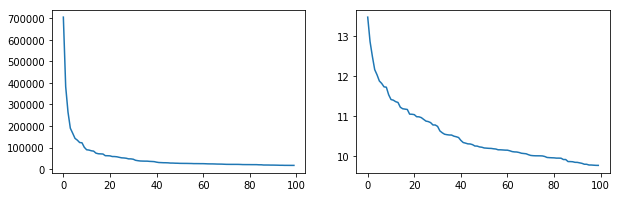

In [66]:
frequencies = [f for w,f in words_count.most_common(100)]
x = [i for i in range(100)]

plt.figure(figsize=(10,3))
plt.subplot(121)
plt.plot(x, frequencies)
plt.subplot(122)
plt.plot(x, np.log(frequencies))

## NLP比较重要的规律： 在很大的一个text corpus，文字合中出现频率第二多的单词，是出现频率第一多单词的频率的1/2，频率第N多的单词，是出现频率最高的单词的1/N

In [67]:
# 求某个词在语料中出现的概率
def prob_1(word):
    return words_count[word] / len(TOKEN)

In [68]:
prob_1('我们')

0.0011341646643398752

In [69]:
prob_1('吃饭')

1.8730574478638717e-05

In [70]:
prob_1('国际')

0.0020343674256465723

In [71]:
TOKEN[:20]

['此外',
 '自',
 '本周',
 '6',
 '月',
 '12',
 '日起',
 '除',
 '小米',
 '手机',
 '6',
 '等',
 '15',
 '款',
 '机型',
 '外',
 '其余',
 '机型',
 '已',
 '暂停']

In [72]:
TOKEN = [str(t) for t in TOKEN]

In [73]:
TOKEN[:10]

['此外', '自', '本周', '6', '月', '12', '日起', '除', '小米', '手机']

In [74]:
TOKEN_2_GRAM = [''.join(TOKEN[i:i+2]) for i in range(len(TOKEN[:-2]))]

In [75]:
TOKEN_2_GRAM[:10]

['此外自', '自本周', '本周6', '6月', '月12', '12日起', '日起除', '除小米', '小米手机', '手机6']

In [76]:
words_count_2 = Counter(TOKEN_2_GRAM)

In [77]:
# 求某个词在语料中出现的概率
def prob_1(word): 
    return words_count[word] / len(TOKEN)

In [78]:
# 求某两个相连的词在语料中出现的概率
def prob_2(word1, word2):
    if word1 + word2 in words_count_2: 
        return words_count_2[word1+word2] / len(TOKEN_2_GRAM)
    else:
        return 1 / len(TOKEN_2_GRAM)

In [79]:
prob_2('我们', '在')

3.053651579830484e-05

In [80]:
prob_2('在', '吃饭')

2.837966152258814e-07

In [81]:
prob_2('去', '吃饭')

7.946305226324679e-07

In [82]:
def get_probablity(sentence):
    #首先把句子分词
    words = list(cut(sentence))
    #句子概率初始化
    sentence_pro = 1
    
    for i, word in enumerate(words[:-1]):
        next_ = words[i+1]
        #两个词连在一起的概率
        probability = prob_2(word, next_)
        #一个句子里每两个词连在一起的概率全部相乘，就是这个句子的概率
        sentence_pro *= probability
    sentence_pro *= prob_1(words[-1])
    return sentence_pro

In [83]:
get_probablity('小明今天抽奖抽到一台苹果手机')

2.5561105389388563e-46

In [84]:
get_probablity('小明今天抽奖抽到一架波音飞机')

1.9410839822237363e-45

In [85]:
get_probablity('洋葱奶昔来一杯')

9.756108749344807e-28

In [86]:
get_probablity('养乐多绿来一杯')

1.7188557272925288e-20

In [87]:
for sen in [generate(gram=example_grammar, target='sentence') for i in range(10)]:
    print('sentence: {} with Prb: {}'.format(sen, get_probablity(sen)))

sentence: 这个篮球坐在一个蓝色的女人 with Prb: 4.798507544754801e-45
sentence: 这个好看的小小的蓝色的篮球听着这个蓝色的小猫 with Prb: 1.0153808948867379e-81
sentence: 这个女人听着这个小猫 with Prb: 6.057723934467364e-39
sentence: 这个篮球听着这个小猫 with Prb: 3.028861967233682e-39
sentence: 一个女人看见一个桌子 with Prb: 1.8238408476679994e-33
sentence: 这个桌子听着这个小小的小小的小猫 with Prb: 8.78206011321545e-53
sentence: 一个好看的女人坐在这个女人 with Prb: 1.5355224143215366e-45
sentence: 一个小猫看见这个小小的蓝色的小小的篮球 with Prb: 1.034951361185298e-58
sentence: 这个蓝色的小小的桌子看着这个篮球 with Prb: 3.0390054756923724e-52
sentence: 这个蓝色的桌子坐在一个桌子 with Prb: 4.89643627015796e-46


In [88]:
need_compared = [
    "今天晚上请你吃大餐，我们一起吃日料 明天晚上请你吃大餐，我们一起吃苹果",
    "真事一只好看的小猫 真是一只好看的小猫",
    "今晚我去吃火锅 今晚火锅去吃我",
    "洋葱奶昔来一杯 养乐多绿来一杯"
]

for s in need_compared:
    s1, s2 = s.split()
    p1, p2 = get_probablity(s1), get_probablity(s2)
    
    better = s1 if p1 > p2 else s2
    
    print('{} is more possible'.format(better))
    print('-'*4 + ' {} with probility {}'.format(s1, p1))
    print('-'*4 + ' {} with probility {}'.format(s2, p2))

明天晚上请你吃大餐，我们一起吃苹果 is more possible
---- 今天晚上请你吃大餐，我们一起吃日料 with probility 2.144339355169433e-73
---- 明天晚上请你吃大餐，我们一起吃苹果 with probility 9.46082523500754e-71
真是一只好看的小猫 is more possible
---- 真事一只好看的小猫 with probility 1.1555717788551752e-39
---- 真是一只好看的小猫 with probility 2.035915364838697e-32
今晚我去吃火锅 is more possible
---- 今晚我去吃火锅 with probility 1.3513248501752063e-26
---- 今晚火锅去吃我 with probility 6.720877087491819e-31
养乐多绿来一杯 is more possible
---- 洋葱奶昔来一杯 with probility 9.756108749344807e-28
---- 养乐多绿来一杯 with probility 1.7188557272925288e-20
